In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Original_format (no dimensionality reduction) csv file as a dataframe
df = pd.read_csv('/Users/money/Downloads/CS_4641_Project_3/Original_format.csv')

# Add a column to df that extracts the base number of each song file (to be used later to ensure that all versions of a song remain on the 
# same side of the train-test split)
df['base_num'] = df['base_name'].apply(lambda x: int(x.split('.')[-1]))
df

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var,genre,base_name,base_num
0,jazz.00054.wav,0.278350,0.083777,0.162285,0.002734,1670.514952,255435.104508,2109.840494,191677.107160,3464.615835,...,49.986897,56.108070,44.334808,56.535625,60.792698,52.402107,100.981697,jazz,jazz.00054,54
1,jazz.00054.wav_noise,0.278534,0.083735,0.162372,0.002731,1873.114099,195629.983148,2401.186979,105595.733654,3976.104293,...,49.982077,54.586213,44.082935,54.956999,59.712637,50.444443,98.810023,jazz,jazz.00054,54
2,jazz.00054.wav_stretch,0.281529,0.084627,0.110718,0.001720,1682.177749,262527.779600,2124.657374,188803.823778,3502.481357,...,54.194370,63.407555,57.184631,64.662544,60.914871,53.017963,87.638412,jazz,jazz.00054,54
3,jazz.00054.wav_shift,0.281991,0.085039,0.111249,0.001556,1556.315683,202338.670883,1941.702430,161469.252931,3218.972575,...,50.973839,54.009003,63.597214,47.786098,60.711685,71.702690,76.442741,jazz,jazz.00054,54
4,reggae.00080.wav,0.476890,0.093863,0.195643,0.010612,2539.081379,876180.289217,2644.414291,166273.908244,5260.713072,...,53.472607,70.771408,63.213917,44.314583,42.793770,66.892647,76.829124,reggae,reggae.00080,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,jazz.00033.wav_shift,0.286758,0.097999,0.048918,0.000909,1105.946842,116552.163485,1415.747937,48362.037679,2322.246875,...,28.159718,36.060966,33.795025,32.908161,40.374920,32.549992,44.468338,jazz,jazz.00033,33
3996,reggae.00099.wav,0.431152,0.081997,0.180071,0.001488,2467.192946,454208.564894,2006.401423,30952.430421,4723.590385,...,30.859421,25.813581,33.468212,42.980068,40.307625,25.604368,25.045523,reggae,reggae.00099,99
3997,reggae.00099.wav_noise,0.431302,0.081936,0.180146,0.001486,2601.299336,348220.250967,2210.863759,32341.838854,4931.894565,...,26.750030,26.455203,32.795200,46.505747,36.698436,23.679584,23.921725,reggae,reggae.00099,99
3998,reggae.00099.wav_stretch,0.417107,0.081150,0.126116,0.001083,2542.085470,427305.840162,2034.793684,30433.269199,4816.488511,...,33.039711,27.899855,40.995232,51.655884,43.510025,28.145319,32.499886,reggae,reggae.00099,99


Average classification report:
blues: Precision: 0.6321169913369904, Recall: 0.44000000000000006, F1-Score: 0.5041472976033866
classical: Precision: 0.8761106049335702, Recall: 0.8975, F1-Score: 0.8760752061485839
country: Precision: 0.6373749644705988, Recall: 0.61, F1-Score: 0.6173199444334293
disco: Precision: 0.46670189550869134, Recall: 0.57, F1-Score: 0.5129714593785172
hiphop: Precision: 0.6061726248435109, Recall: 0.5549999999999999, F1-Score: 0.5721919561861688
jazz: Precision: 0.7122425595847977, Recall: 0.7949999999999999, F1-Score: 0.7386295338623308
metal: Precision: 0.8136849735347595, Recall: 0.8425, F1-Score: 0.8267122006397829
pop: Precision: 0.7099088982018646, Recall: 0.7175, F1-Score: 0.7016985439555777
reggae: Precision: 0.5514116168414807, Recall: 0.5449999999999999, F1-Score: 0.5456708027721578
rock: Precision: 0.330514956862185, Recall: 0.3025, F1-Score: 0.30871748626411144

Average Model Accuracy: 0.6275000000000001


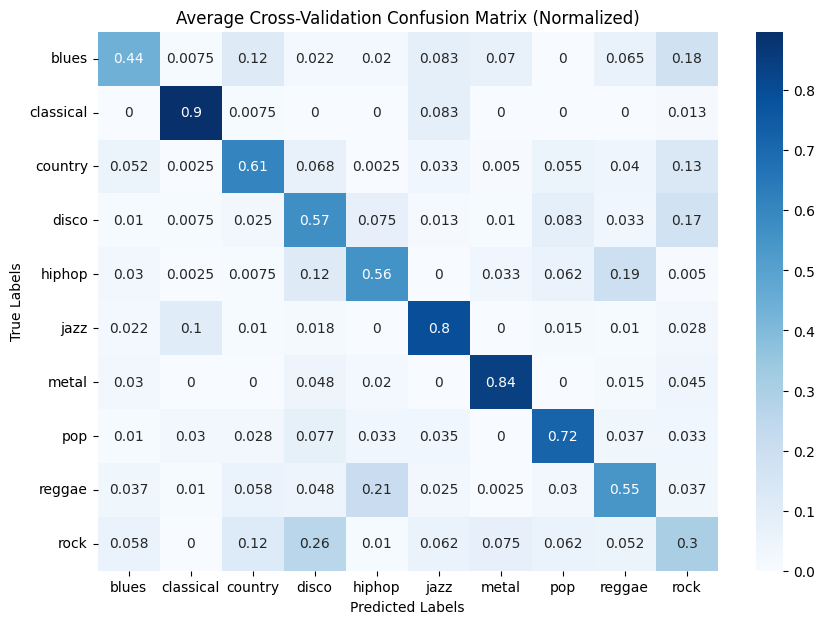

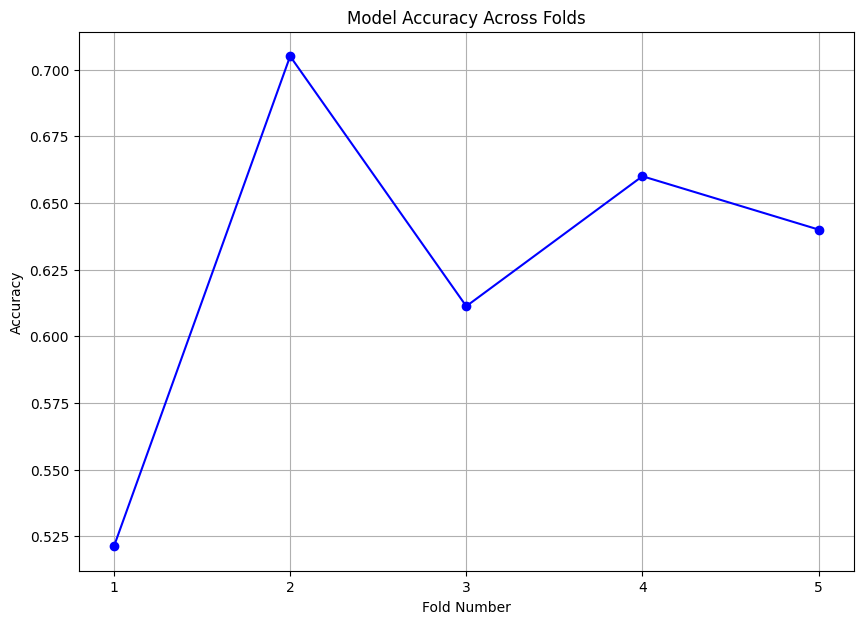

Standard Deviation of Fold Accuracies: 6.127%


In [3]:
# Perform manual 5-fold cross-validation on a SVM model with a Radial Basis Function (RBF) kernel
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics for each fold and initialize the aggregated confusion matrix 
num_folds = 5
fold_size = 99 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a SVM with a RBF kernel and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the SVM model and make a prediction of the genre
    svm_model = SVC(kernel='rbf', gamma='scale')
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm


# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

# Plot the fold accuracies to see variability in performance 
fold_numbers = range(1, len(accuracies) + 1)

plt.figure(figsize=(10, 7))
plt.plot(fold_numbers, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)
plt.grid(True)
plt.show()

# Print standard deviation across fold accuracies 
sd = np.std(accuracies).round(5)
print(f'Standard Deviation of Fold Accuracies: {sd*100}%')



Average classification report:
blues: Precision: 0.526820082765408, Recall: 0.3425, F1-Score: 0.4094630509565514
classical: Precision: 0.8819432020653795, Recall: 0.8674999999999999, F1-Score: 0.8592297730012737
country: Precision: 0.48348552880846585, Recall: 0.58, F1-Score: 0.5249444630497336
disco: Precision: 0.4586642712052515, Recall: 0.48, F1-Score: 0.4679196625667692
hiphop: Precision: 0.5470043431456253, Recall: 0.54, F1-Score: 0.5334857198560992
jazz: Precision: 0.7156996841289708, Recall: 0.7675000000000001, F1-Score: 0.7272553236650598
metal: Precision: 0.7228977476098081, Recall: 0.865, F1-Score: 0.7867311085194404
pop: Precision: 0.7173492799552321, Recall: 0.6825, F1-Score: 0.6930012078385313
reggae: Precision: 0.5006283370702309, Recall: 0.4925, F1-Score: 0.4938737698788664
rock: Precision: 0.36010358033667433, Recall: 0.2575, F1-Score: 0.29375447621368517

Average Model Accuracy: 0.5875


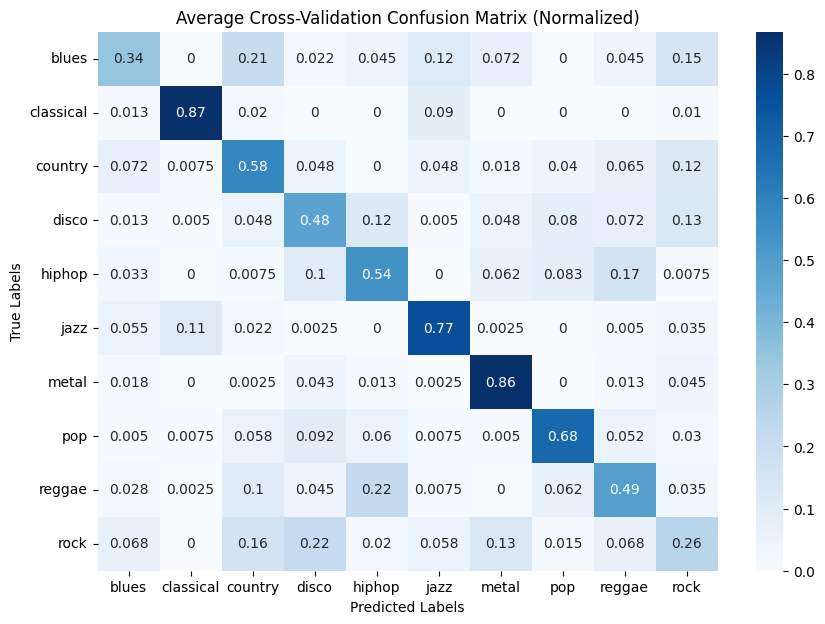

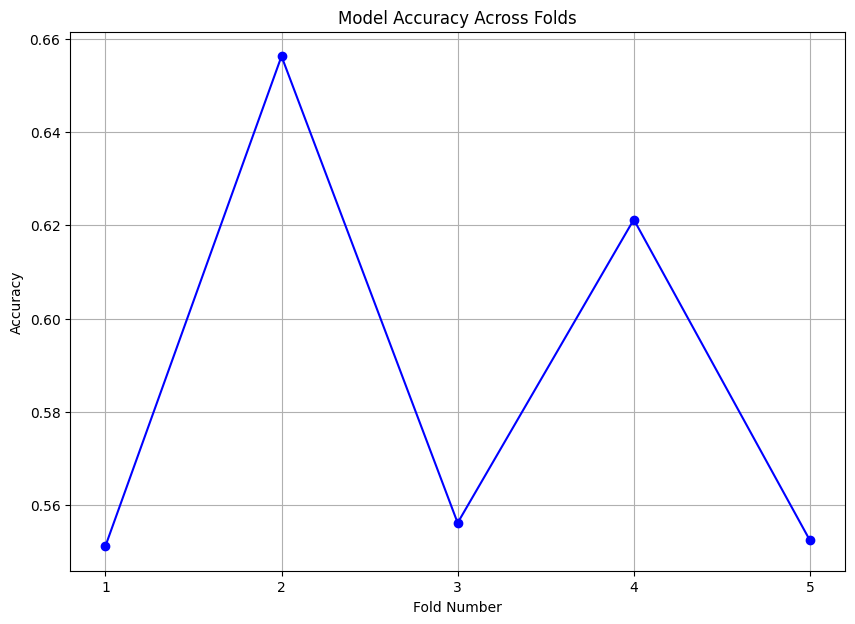

Standard Deviation of Fold Accuracies: 4.332%


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Perform manual 5-fold cross-validation on a RFC model
# Note that this manual process was done to ensure that for each fold, all 4 versions of a song remain on the same side of the train-test split.
# This was done by using the base_num as the split index, which also ensured that the testing data for each fold had the same number of songs
# from each genre (meaning that each genre had the same support, ensuring a more inclusive evaluation of the model's performance)

# Initialize the lists that will hold the performance metrics and confusion matrix for each fold
num_folds = 5
fold_size = 99 // num_folds
results = []
accuracies = []
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))

# Loop through each fold, defining the training and testing indices based on the 'base_num' index. Then train a RFC model and 
# extract the model accuracy, precision, recall, and F1-score for each genre, as well as the confusion matrix for that fold.
# Then append metrics to their respective lists
for fold in range(num_folds):
    # Define train and test indices for 'base_num'
    test_start = fold * fold_size
    test_end = test_start + fold_size
    
    # Split the dataset for the current fold
    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    # Define the training and testing sets (splitting into features and labels)
    X_train = train_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop(['filename', 'base_name', 'genre', 'base_num'], axis=1)
    y_test = test_df['genre']
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the RFC model and make a prediction of the genre
    rfc_model = RandomForestClassifier(random_state=20)
    rfc_model.fit(X_train_scaled, y_train)
    y_pred = rfc_model.predict(X_test_scaled)
    
    # Computer the accuracy for this fold and append it to the accuracy list 
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Collect the precision, recall, and F1-score for each genre for this fold and append it to the results list
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre']))
    results.append((precision, recall, fscore))
    
    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre']))
    aggregated_cm += cm

# Calculate the average metrics across all 5 folds
avg_precision = np.mean([result[0] for result in results], axis=0)
avg_recall = np.mean([result[1] for result in results], axis=0)
avg_fscore = np.mean([result[2] for result in results], axis=0)
avg_accuracy = np.mean(accuracies)

# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Extract all 10 genres from the dataframe
labels = np.unique(df['genre'])

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

print(f'\nAverage Model Accuracy: {avg_accuracy}')

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

# Plot the fold accuracies to see variability in performance 
fold_numbers = range(1, len(accuracies) + 1)

plt.figure(figsize=(10, 7))
plt.plot(fold_numbers, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)
plt.grid(True)
plt.show()

# Print standard deviation across fold accuracies 
sd = np.std(accuracies).round(5)
print(f'Standard Deviation of Fold Accuracies: {sd*100}%')


{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
Epoch 1/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1121 - loss: 4.4636 - val_accuracy: 0.1725 - val_loss: 4.2090
Epoch 2/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.1488 - loss: 4.2720 - val_accuracy: 0.2463 - val_loss: 4.0574
Epoch 3/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.1978 - loss: 4.0971 - val_accuracy: 0.2975 - val_loss: 3.9168
Epoch 4/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.2513 - loss: 3.9530 - val_accuracy: 0.3275 - val_loss: 3.7773
Epoch 5/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.2880 - loss: 3.8177 - val_accuracy: 0.3413 - val_loss: 3.6459
Epoch 6/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.3155 - loss: 3.6750 - val_accuracy: 0.3625 - val_loss: 3.5211
Epoch 7/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.3545 - loss: 3.5246 - val_acc

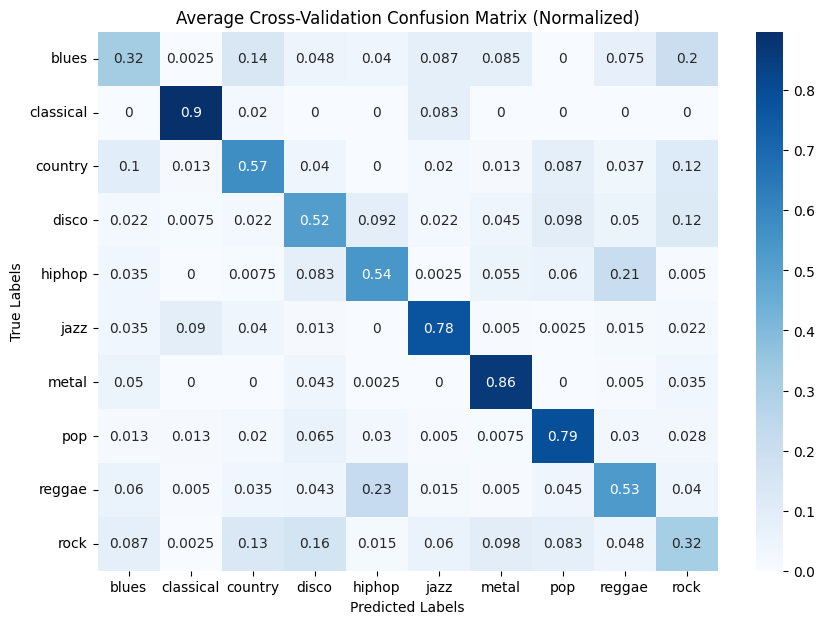

Average accuracy: 0.6122499942779541


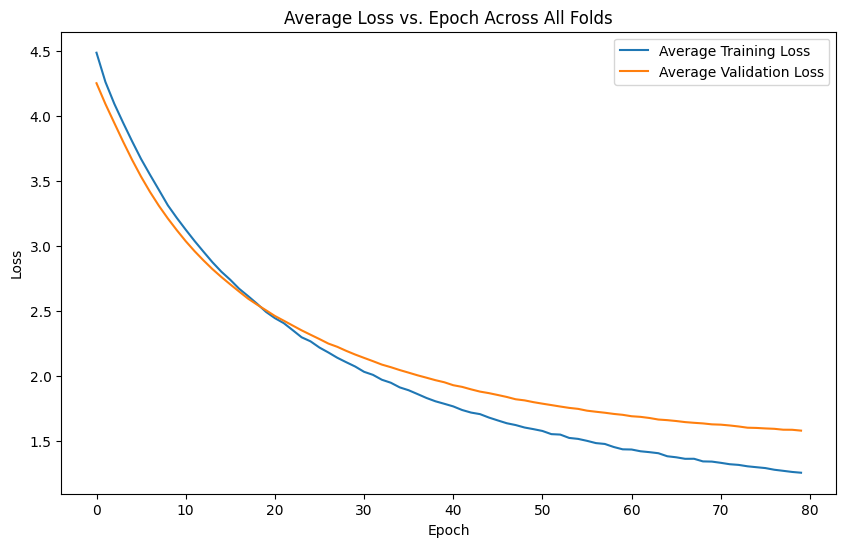

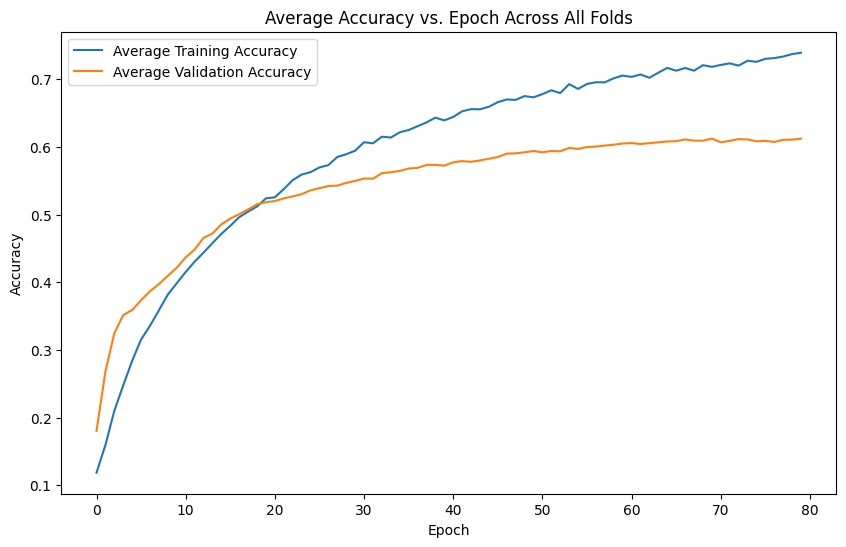

Average classification report:
blues: Precision: 0.526820082765408, Recall: 0.3425, F1-Score: 0.4094630509565514
classical: Precision: 0.8819432020653795, Recall: 0.8674999999999999, F1-Score: 0.8592297730012737
country: Precision: 0.48348552880846585, Recall: 0.58, F1-Score: 0.5249444630497336
disco: Precision: 0.4586642712052515, Recall: 0.48, F1-Score: 0.4679196625667692
hiphop: Precision: 0.5470043431456253, Recall: 0.54, F1-Score: 0.5334857198560992
jazz: Precision: 0.7156996841289708, Recall: 0.7675000000000001, F1-Score: 0.7272553236650598
metal: Precision: 0.7228977476098081, Recall: 0.865, F1-Score: 0.7867311085194404
pop: Precision: 0.7173492799552321, Recall: 0.6825, F1-Score: 0.6930012078385313
reggae: Precision: 0.5006283370702309, Recall: 0.4925, F1-Score: 0.4938737698788664
rock: Precision: 0.36010358033667433, Recall: 0.2575, F1-Score: 0.29375447621368517


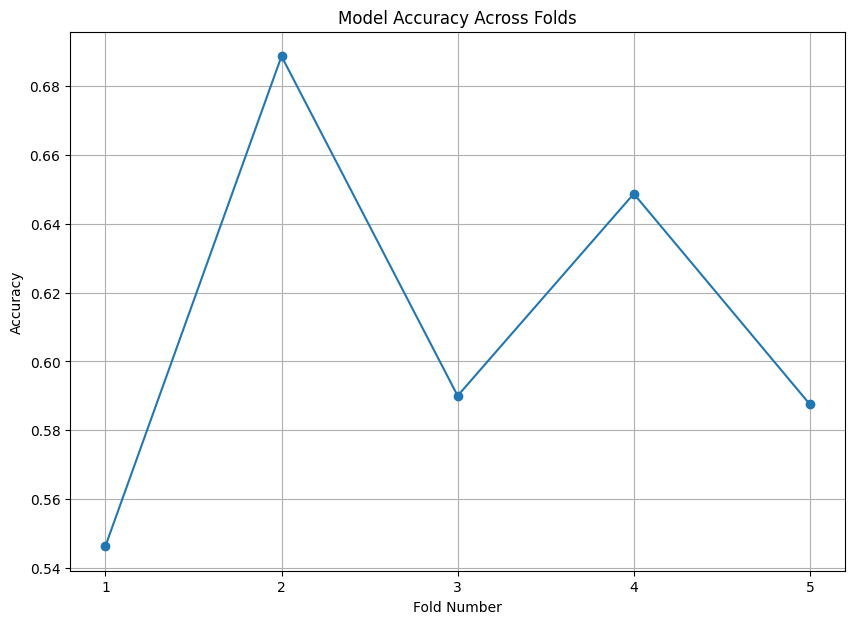

Standard Deviation of Fold Accuracies: 5.029999999999999%


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras as keras

num_folds = 5
fold_size = 99 // num_folds

# Turn genres into numerical encoding for ANN
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])
genre_names = label_encoder.classes_
genre_to_num_mapping = {genre: label_encoder.transform([genre])[0] for genre in genre_names}
print(genre_to_num_mapping) # For reference

# Initialize lists to store metrics
results = [] # tupple of (precision, recall, fscore) for each genre
accuracies = [] # to store accuracy for each fold and later calculate average
folds_histories = [] # to store history of each fold for plotting
aggregated_cm = np.zeros((len(np.unique(df['genre'])), len(np.unique(df['genre']))))
for fold in range(num_folds):
    test_start = fold * fold_size
    test_end = test_start + fold_size

    train_df = df[~df['base_num'].between(test_start, test_end)]
    test_df = df[df['base_num'].between(test_start, test_end)]
    
    X_train = train_df.drop(columns=['filename', 'base_name', 'genre', 'base_num', 'genre_encoded'], axis=1)    
    y_train = train_df['genre_encoded']
    X_test = test_df.drop(columns=['filename', 'base_name', 'genre', 'base_num', 'genre_encoded'], axis=1)    
    y_test = test_df['genre_encoded']
    
    # print(X_train.shape)
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # print(X_train_scaled.shape)
    # print(f"Fold {fold+1}: X_train_scaled: {X_train_scaled.shape}, y_train: {y_train.shape}, X_test_scaled: {X_test_scaled.shape}, y_test: {y_test.shape}")


    # Build and compile the ANN model
    model = Sequential([
        # input layer with 57 features from each song
        Input(shape=(X_train_scaled.shape[1],)), 
        # HIDDEEN LAYERS
        keras.layers.Dense(110, activation='relu', kernel_regularizer=keras.regularizers.l2(0.009)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(74, activation='relu', kernel_regularizer=keras.regularizers.l2(0.009)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.009)),
        keras.layers.Dropout(0.3),
        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model.summary()

    # Train the network
    history = model.fit(X_train_scaled, y_train,
                        validation_data=(X_test_scaled, y_test),
                        epochs=80,
                        batch_size=32)
    # append the last test accuracy value from the last epoch of each fold     
    accuracies.append(history.history['val_accuracy'][-1]) 
    folds_histories.append(history.history)

    # Generate predictions
    y_pred_probabilities = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_probabilities, axis=1)

    # Calculate percision, recall, and fscore for each genre
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=np.unique(df['genre_encoded']))
    results.append((precision, recall, fscore))

    # Compute the confusion matrix for this fold and add it towards the aggregated confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(df['genre_encoded']))
    aggregated_cm += cm
    
    print(accuracies)



# Calculate the average confusion matrix across all 5 folds (normalized across each row)
avg_cm = aggregated_cm.astype('float') / aggregated_cm.sum(axis=1)[:, np.newaxis]

# Plot the average normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Average Cross-Validation Confusion Matrix (Normalized)')
plt.show()

# Average Loss vs. Epoch Plot
average_accuracy = np.mean(accuracies)
print(f'Average accuracy: {average_accuracy}')
avg_train_loss = np.mean([history['loss'] for history in folds_histories], axis=0)
avg_val_loss = np.mean([history['val_loss'] for history in folds_histories], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(avg_train_loss, label='Average Training Loss')
plt.plot(avg_val_loss, label='Average Validation Loss')
plt.title('Average Loss vs. Epoch Across All Folds')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate average accuracy across all folds for each epoch
avg_train_accuracy = np.mean([history['accuracy'] for history in folds_histories], axis=0)
avg_val_accuracy = np.mean([history['val_accuracy'] for history in folds_histories], axis=0)

# Plot the average accuracy
plt.figure(figsize=(10, 6))
plt.plot(avg_train_accuracy, label='Average Training Accuracy')
plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
plt.title('Average Accuracy vs. Epoch Across All Folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print average results of the 5-fold cross validation
print('Average classification report:')
for i, label in enumerate(labels):
    print(f'{label}: Precision: {avg_precision[i]}, Recall: {avg_recall[i]}, F1-Score: {avg_fscore[i]}')

# Plot accuracy by fold
plt.figure(figsize=(10, 7))
plt.plot(range(1, num_folds + 1), accuracies, marker='o', linestyle='-')
plt.title('Model Accuracy Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)
plt.show()

# Print standard deviation across fold accuracies 
sd = np.std(accuracies).round(5)
print(f'Standard Deviation of Fold Accuracies: {sd*100}%')

